<a href="https://colab.research.google.com/github/Megha2004/NaturalLanguageProcessing/blob/main/Embedding_of_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


corpus = [
    "I love natural language processing.",
    "Word embeddings capture semantic relationships.",
    "Machine learning models are powerful."
]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

model = Word2Vec(sentences=tokenized_corpus, vector_size=2, window=5, min_count=1, workers=4)

model.save("word2vec.model")

word_vectors = model.wv

vector_processing = word_vectors['processing']
print(f"Vector for 'processing': {vector_processing}")

similar_words = word_vectors.most_similar('processing', topn=1)
print(f"Words similar to 'processing': {similar_words}")

Vector for 'processing': [0.33788466 0.03814328]
Words similar to 'processing': [('capture', 0.975977897644043)]


In [ ]:
!pip install networkx

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


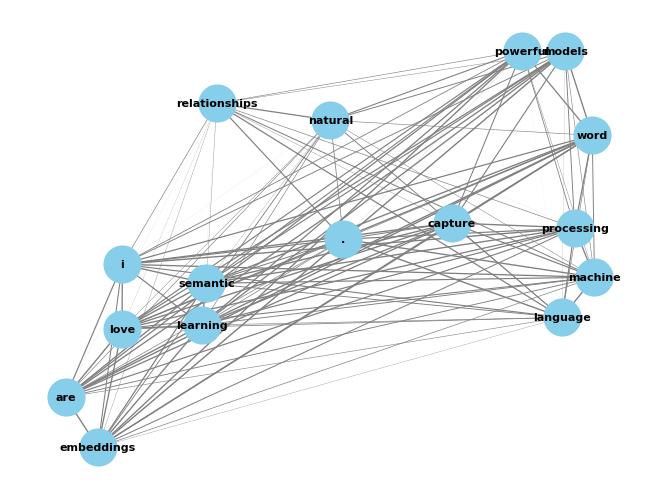

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

# Sample dataset
corpus = [
    "I love natural language processing.",
    "Word embeddings capture semantic relationships.",
    "Machine learning models are powerful."
]

# Tokenize the sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=2, window=5, min_count=1, workers=4)

# Word vectors
word_vectors = model.wv

# Words from the corpus
words_from_corpus = [word for sentence in tokenized_corpus for word in sentence]

# Unique words from the corpus
unique_words = list(set(words_from_corpus))

# Create a graph
G = nx.Graph()

# Add nodes to the graph
for word in unique_words:
    G.add_node(word, pos=word_vectors[word])

# Add edges with cosine similarity as the weight
for i in range(len(unique_words)):
    for j in range(i + 1, len(unique_words)):
        word_i, word_j = unique_words[i], unique_words[j]
        cosine_similarity = word_vectors.similarity(word_i, word_j)
        G.add_edge(word_i, word_j, weight=cosine_similarity)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

nx.draw(G, pos, with_labels=True, font_size=8, font_color='black', node_size=700, node_color='skyblue', font_weight='bold', edgelist=edges, width=weights, edge_color='gray', edge_cmap=plt.cm.Blues)

# Display the graph
plt.show()


In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt')

documents = [
    "I love natural language processing.",
    "Word embeddings capture semantic relationships.",
    "Machine learning models are powerful.",
    "Search engines use algorithms to rank documents.",
    "Semantic search enhances relevance and understanding.",
    "Document retrieval is a key component of smart search."
]

tokenized_documents = [word_tokenize(doc.lower()) for doc in documents]
word2vec_model = Word2Vec(sentences=tokenized_documents, vector_size=50, window=5, min_count=1, workers=4)

query = input("Enter your query sentence: ")

tokenized_query = word_tokenize(query.lower())

filtered_query = [word for word in tokenized_query if word in word2vec_model.wv]

if not filtered_query:
    print("No valid words in the query.")
else:
    query_vector = sum(word2vec_model.wv[word] for word in filtered_query) / len(filtered_query)

    document_vectors = [sum(word2vec_model.wv[word] for word in doc) / len(doc) for doc in tokenized_documents]
    similarities = [cosine_similarity([query_vector], [doc_vector])[0][0] for doc_vector in document_vectors]

    top_document_index = similarities.index(max(similarities))

    top_document = documents[top_document_index]
    print(f"Top-ranked document: {top_document}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Enter your query sentence: what is word embeddings
Top-ranked document: Word embeddings capture semantic relationships.
